In [15]:
import csv
num_attribute=6
a=[]
with open(r'C:\Users\bhuva\OneDrive\Documents\Data\enjoysport.csv') as csvfile:
 reader=csv.reader(csvfile)
 for row in reader:
  a.append(row)
  print(row)
print("\n The total number of training instances are : ",len(a))
num_attribute = len(a[0])-1
print("\n The initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)
for j in range(0,num_attribute):
    hypothesis[j]=a[0][j]
print("\n Find-S: Finding maximally specific Hypothesis\n")
for i in range(0,len(a)):
    if a[i][num_attribute]=='yes':
        for j in range(0,num_attribute):
            if a[i][j]!=hypothesis[j]:
                hypothesis[j]='?'
            else:
                hypothesis[j]=a[i][j]
    print("\n For training Example No:{0} the hypothesis is".format(i),hypothesis)
print("\n The Maximally specific hypothesis for the training instance is ")
print(hypothesis)

['sunny', 'warm ', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm ', 'high', 'strong', 'warm', 'same', 'yes']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']
['sunny', 'warm ', 'high', 'strong', 'cool', 'change', 'yes']

 The total number of training instances are :  4

 The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

 Find-S: Finding maximally specific Hypothesis


 For training Example No:0 the hypothesis is ['sunny', 'warm ', 'normal', 'strong', 'warm', 'same']

 For training Example No:1 the hypothesis is ['sunny', 'warm ', '?', 'strong', 'warm', 'same']

 For training Example No:2 the hypothesis is ['sunny', 'warm ', '?', 'strong', 'warm', 'same']

 For training Example No:3 the hypothesis is ['sunny', 'warm ', '?', 'strong', '?', '?']

 The Maximally specific hypothesis for the training instance is 
['sunny', 'warm ', '?', 'strong', '?', '?']


In [16]:
import csv
a=[]
with open(r"C:\Users\bhuva\OneDrive\Documents\Data\enjoysport.csv") as csvfile:
    fdata=csv.reader(csvfile)
    for row in fdata:
        a.append(row)
        print(row)
num_att=len(a[0])-1
S=['0']*num_att
G=['?']*num_att
print(S)
print(G)
temp=[]
for i in range(0,num_att):
    S[i]=a[0][i]
print("................................................")
for i in range(0,len(a)):
    if a[i][num_att]=="yes":
        for j in range(0,num_att):
            if S[j]!=a[i][j]:
                S[j]='?'
        for j in range(0,num_att):
            for k in range(0,len(temp)):
                if temp[k][j]!=S[j] and temp[k][j]!='?':
                    del temp[k]
    if a[i][num_att]=="no":
        for j in range(0,num_att):
            if a[i][j]!=S[j] and S[j]!='?':
                G[j]=S[j]
                temp.append(G)
                G=['?']*num_att
    print(S)
    if len(temp)==0:
        print(G)
    else:
        print(temp)
    print("......................................................................")

['sunny', 'warm ', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm ', 'high', 'strong', 'warm', 'same', 'yes']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']
['sunny', 'warm ', 'high', 'strong', 'cool', 'change', 'yes']
['0', '0', '0', '0', '0', '0']
['?', '?', '?', '?', '?', '?']
................................................
['sunny', 'warm ', 'normal', 'strong', 'warm', 'same']
['?', '?', '?', '?', '?', '?']
......................................................................
['sunny', 'warm ', '?', 'strong', 'warm', 'same']
['?', '?', '?', '?', '?', '?']
......................................................................
['sunny', 'warm ', '?', 'strong', 'warm', 'same']
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm ', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
......................................................................
['sunny', 'warm ', '?', 'strong', '?', '?']
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm ', '?', '?', '

In [17]:
import pandas as pd
import math
df = pd.read_csv(r'C:\Users\bhuva\OneDrive\Documents\Data\PlayTennis.csv')
print("\n Input Data Set is:\n", df)
t = df.keys()[-1]
print('Target Attribute is: ', t)
attribute_names = list(df.keys())
attribute_names.remove(t)
print('Predicting Attributes: ', attribute_names)
def entropy(probs): 
    return sum( [-prob*math.log(prob, 2) for prob in probs])
def entropy_of_list(ls,value):
    from collections import Counter
    cnt = Counter(x for x in ls)
    print('Target attribute class count(Yes/No)=',dict(cnt))
    total_instances = len(ls)
    print("Total no of instances/records associated with {0} is: {1}".format(value,total_instances ))
    probs = [x / total_instances for x in cnt.values()]
    print("Probability of Class {0} is: {1:.4f}".format(min(cnt),min(probs)))
    print("Probability of Class {0} is: {1:.4f}".format(max(cnt),max(probs)))
    return entropy(probs)
def information_gain(df, split_attribute, target_attribute,battr):
    print("\n\n-----Information Gain Calculation of ",split_attribute, " --------")
    df_split = df.groupby(split_attribute) # group the data based on attribute values
    glist=[]
    for gname,group in df_split:
        print('Grouped Attribute Values \n',group)
        glist.append(gname)
    glist.reverse()
    nobs = len(df.index) * 1.0
    df_agg1=df_split.agg({target_attribute:lambda x:entropy_of_list(x, glist.pop())})
    df_agg2=df_split.agg({target_attribute :lambda x:len(x)/nobs})
    df_agg1.columns=['Entropy']
    df_agg2.columns=['Proportion']
    new_entropy = sum( df_agg1['Entropy'] * df_agg2['Proportion'])
    if battr !='S':
        old_entropy = entropy_of_list(df[target_attribute],'S-'+df.iloc[0][df.columns.get_loc(battr)])
    else:
        old_entropy = entropy_of_list(df[target_attribute],battr)
    return old_entropy - new_entropy
def id3(df, target_attribute, attribute_names, default_class=None,default_attr='S'):
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute])
    if len(cnt) == 1:
        return next(iter(cnt)) 
    elif df.empty or (not attribute_names):
        return default_class 
    else:
        default_class = max(cnt.keys()) 
        gainz=[]
        for attr in attribute_names:
            ig= information_gain(df, attr, target_attribute,default_attr)
            gainz.append(ig)
            print('Information gain of ',attr,' is : ',ig)
        index_of_max = gainz.index(max(gainz))
        best_attr = attribute_names[index_of_max]
        print("\n Attribute with the maximum gain is: ",best_attr)
        tree = {best_attr:{}} 
        remaining_attribute_names =[i for i in attribute_names if i != best_attr]
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute,remaining_attribute_names,default_class,best_attr)
            tree[best_attr][attr_val] = subtree
        return tree
    from pprint import pprint
tree = id3(df,t,attribute_names)
print("\nThe Resultant Decision Tree is:")
print(tree)
def classify(instance, tree,default=None): 
    attribute = next(iter(tree)) 
    if instance[attribute] in tree[attribute].keys(): 
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict): 
            return classify(instance, result)
        else:
            return result
    else:
        return default
df_new=pd.read_csv(r'C:\Users\bhuva\OneDrive\Documents\Data\PlayTennisTest.csv')
df_new['predicted'] = df_new.apply(classify, axis=1, args=(tree,'?'))
print(df_new)


 Input Data Set is:
      Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No
Target Attribute is:  PlayTennis
Predicting Attributes:  ['Outlook', 'Temperature', 'Humidity', 'Wind']


-----Information Gain Calculation of  Outlook  --------
Grouped Attribute Val

In [18]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]))
y = np.array(([92], [86], [89]))
y = y/100
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)
epoch=10000
lr=0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bias_hidden=np.random.uniform(size=(1,hiddenlayer_neurons))
weight_hidden=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bias_output=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp= hinp1 + bias_hidden
    hlayer_activation = sigmoid(hinp)
    outinp1=np.dot(hlayer_activation,weight_hidden)
    outinp= outinp1+ bias_output
    output = sigmoid(outinp)
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(weight_hidden.T)
    hiddengrad = derivatives_sigmoid(hlayer_activation)
    d_hiddenlayer = EH * hiddengrad
    weight_hidden += hlayer_activation.T.dot(d_output) *lr
    bias_hidden += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bias_output += np.sum(d_output, axis=0,keepdims=True) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[2 9]
 [1 5]
 [3 6]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89082496]
 [0.88869631]
 [0.89031666]]


In [19]:
import numpy as np
import math
import csv
import pdb
def read_data(filename):
    with open(filename,'r') as csvfile:
        datareader = csv.reader(csvfile)
        metadata = next(datareader)
        traindata=[]
        for row in datareader:
            traindata.append(row)
    return (metadata, traindata)
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    testset = list(dataset)
    i=0
    while len(trainSet) < trainSize:
        trainSet.append(testset.pop(i))
    return [trainSet, testset]
def classify(data,test):
    total_size = data.shape[0]
    print("\n")
    print("training data size=",total_size)
    print("test data size=",test.shape[0])
    countYes = 0
    countNo = 0
    probYes = 0
    probNo = 0
    print("\n")
    print("target count probability")
    for x in range(data.shape[0]):
        if data[x,data.shape[1]-1] == 'yes':
            countYes +=1
        if data[x,data.shape[1]-1] == 'no':
            countNo +=1
    probYes=countYes/total_size
    probNo= countNo / total_size
    print('Yes',"\t",countYes,"\t",probYes)
    print('No',"\t",countNo,"\t",probNo)
    prob0 =np.zeros((test.shape[1]-1))
    prob1 =np.zeros((test.shape[1]-1))
    accuracy=0
    print("\n")
    print("instance prediction target")
    for t in range(test.shape[0]):
        for k in range (test.shape[1]-1):
            count1=count0=0
            for j in range (data.shape[0]):
                if test[t,k] == data[j,k] and data[j,data.shape[1]-1]=='no':
                    count0+=1
                if test[t,k]==data[j,k] and data[j,data.shape[1]-1]=='yes':
                    count1+=1
            prob0[k]=count0/countNo
            prob1[k]=count1/countYes
        probno=probNo
        probyes=probYes
        for i in range(test.shape[1]-1):
            probno=probno*prob0[i]
            probyes=probyes*prob1[i]
        if probno>probyes:
            predict='no'
        else:
            predict='yes'
        print(t+1,"\t",predict,"\t ",test[t,test.shape[1]-1])
        if predict == test[t,test.shape[1]-1]:
            accuracy+=1
    final_accuracy=(accuracy/test.shape[0])*100
    print("accuracy",final_accuracy,"%")
    return
metadata,traindata= read_data(r"C:\Users\bhuva\OneDrive\Documents\Data\tennis.csv")
splitRatio=0.6
trainingset, testset=splitDataset(traindata, splitRatio)
training=np.array(trainingset)
print("\n The Training data set are:")
for x in trainingset:
    print(x)
testing=np.array(testset)
print("\n The Test data set are:")
for x in testing:
    print(x)
classify(training,testing)


 The Training data set are:
['sunny', 'hot', 'high', 'Weak', 'no']
['sunny', 'hot', 'high', 'Strong', 'no']
['overcast', 'hot', 'high', 'Weak', 'yes']
['rainy', 'mild', 'high', 'Weak', 'yes']
['rainy', 'cool', 'normal', 'Weak', 'yes']
['rainy', 'cool', 'normal', 'Strong', 'no']
['overcast', 'cool', 'normal', 'Strong', 'yes']
['sunny', 'mild', 'high', 'Weak', 'no']

 The Test data set are:
['sunny' 'cool' 'normal' 'Weak' 'yes']
['rainy' 'mild' 'normal' 'Weak' 'yes']
['sunny' 'mild' 'normal' 'Strong' 'yes']
['overcast' 'mild' 'high' 'Strong' 'yes']
['overcast' 'hot' 'normal' 'Weak' 'yes']
['rainy' 'mild' 'high' 'Strong' 'no']


training data size= 8
test data size= 6


target count probability
Yes 	 4 	 0.5
No 	 4 	 0.5


instance prediction target
1 	 no 	  yes
2 	 yes 	  yes
3 	 no 	  yes
4 	 yes 	  yes
5 	 yes 	  yes
6 	 no 	  no
accuracy 66.66666666666666 %


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
msg=pd.read_csv(r'C:\Users\bhuva\OneDrive\Documents\Data\naivetext.csv',names=['message','label'])
print('The dimensions of the dataset',msg.shape)
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print ('\n the total number of Training Data :',ytrain.shape)
print ('\n the total number of Test Data :',ytest.shape)
cv = CountVectorizer()
xtrain_dtm = cv.fit_transform(xtrain)
xtest_dtm=cv.transform(xtest)
print('\n The words or Tokens in the text documents \n')
print(cv.get_feature_names())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=cv.get_feature_names())
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)
print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('\n The value of Precision', metrics.precision_score(ytest,predicted))
print('\n The value of Recall', metrics.recall_score(ytest,predicted))

The dimensions of the dataset (18, 2)

 the total number of Training Data : (13,)

 the total number of Test Data : (5,)

 The words or Tokens in the text documents 

['about', 'am', 'amazing', 'an', 'and', 'awesome', 'bad', 'beers', 'best', 'boss', 'can', 'deal', 'do', 'enemy', 'feel', 'fun', 'good', 'have', 'horrible', 'house', 'is', 'juice', 'like', 'locality', 'my', 'not', 'of', 'place', 'sick', 'stay', 'stuff', 'taste', 'that', 'the', 'these', 'this', 'tired', 'to', 'today', 'tomorrow', 'very', 'view', 'we', 'went', 'what', 'will', 'with', 'work']

 Accuracy of the classifier is 0.6

 Confusion matrix
[[2 0]
 [2 1]]

 The value of Precision 1.0

 The value of Recall 0.3333333333333333


In [21]:
import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
heartDisease = pd.read_csv(r'C:\Users\bhuva\OneDrive\Documents\Data\heart.csv')
heartDisease = heartDisease.replace('?',np.nan)
print('Sample instances from the dataset are given below')
print(heartDisease.head())
print('\n Attributes and datatypes')
print(heartDisease.dtypes)
model=BayesianModel([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])
print('\n Learning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)
print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)
print('\n 1.Probability of HeartDisease given evidence=restecg :1')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)
print('\n 2.Probability of HeartDisease given evidence= cp:2 ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)

Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca              

Eliminating: sex: 100%|██████████| 5/5 [00:00<00:00, 716.51it/s]


 Inferencing with Bayesian Network:

 1.Probability of HeartDisease given evidence=restecg :1
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1012 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2392 |
+-----------------+---------------------+
| heartdisease(3) |              0.2015 |
+-----------------+---------------------+
| heartdisease(4) |              0.4581 |
+-----------------+---------------------+

 2.Probability of HeartDisease given evidence= cp:2 
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3610 |
+-----------------+---------------------+
| heartdisease(1) |              0.2159 |
+-----------------+---------------------+
| heartdise

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


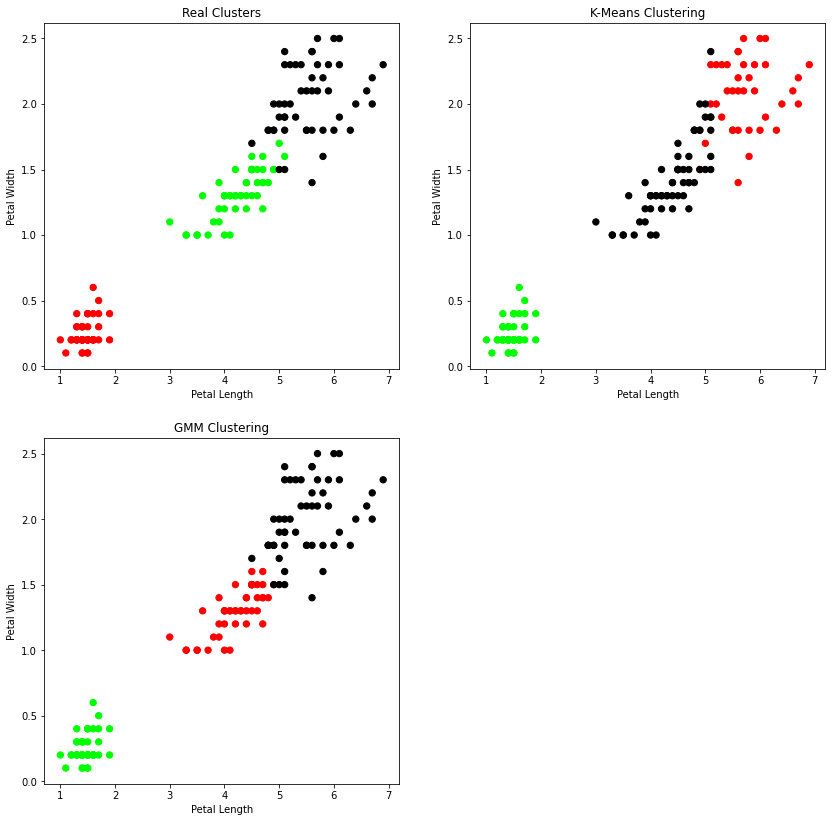

In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(X) 
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of trainng data and its label",x_test.shape, y_test.shape)
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train) 
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:", str(y_pred[r]))
print("Classification Accuracy :" , classifier.score(x_test,y_test));
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))

Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of trainng data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [6.3 3.4 5.6 2.4]  Actual-label: 2  Predicted-label: 2
 Sample: [5.4 3.4 1.5 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [5.4 3.7 1.5 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.9 3.1 5.1 2.3]  Actual-label: 2  Predicted-label: 2
 Sample: [4.6 3.4 1.4 0.3]  Actual-label: 0  Predicted-label: 0
 Sample: [5.5 2.5 4.  1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 3.3 4.7 1.6]  Actual-label: 1  Predicted-label: 1
 Sample: [7.4 2.8 6.1 1.9]  Actual-label: 2  Predicted-label: 2
 Sample: [6.5 2.8 4.6 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [5.3 3.7 1.5 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [4.9 2.5 4.5 1.7]  Actual-label: 2  Predicted-label: 1
 Sample: [5.1 3.4 1.5

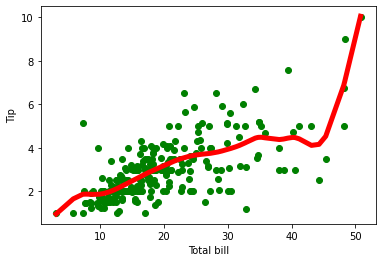

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point,xmat, k): 
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) 
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
data = pd.read_csv(r'C:\Users\bhuva\OneDrive\Documents\Data\data10_tips.csv')
bill = np.array(data.total_bill) 
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) 
ypred = localWeightRegression(X,mtip,2) 
graphPlot(X,ypred)